In [60]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import preprocessor as prp
from skimage import exposure
from skimage.feature import graycomatrix, graycoprops
import mahotas as mh
from pylab import imshow, show

(431, 337, 3)


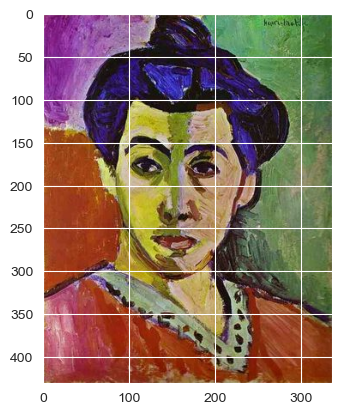

In [61]:
# Loading image
image = cv2.cvtColor(cv2.imread("Henri_Matisse_164.jpg"), cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)

(128, 128, 3)


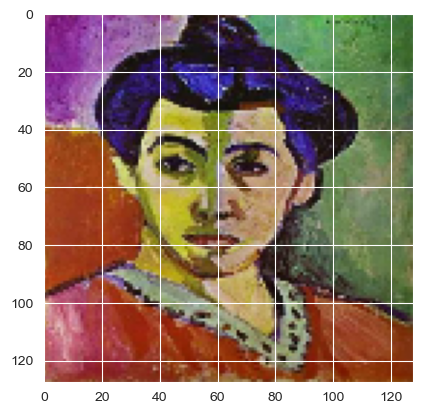

In [62]:
# Resizing in CV2
resized_image = np.array(cv2.resize(image, (128, 128)))
print(resized_image.shape)
plt.imshow(resized_image)

(128, 128, 3)


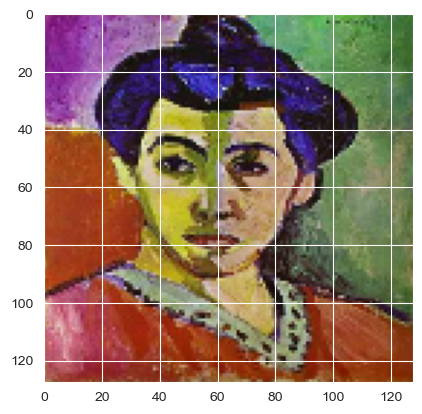

In [63]:
# Normalizing pixel values
normalized_image = prp.minmax_normalize(resized_image)
print(normalized_image.shape)
plt.imshow(normalized_image)

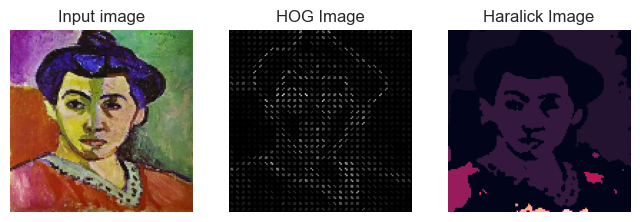

In [82]:
# HOG:
from skimage.feature import hog

gray = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2GRAY)

# HOG parameters
fd, hog_image = hog(gray, orientations=12, pixels_per_cell=(4, 4),
                    cells_per_block=(8, 8), visualize=True, block_norm="L1", transform_sqrt=False)

# setting gaussian filter
gaussian = mh.gaussian_filter(gray, 1)
# setting threshold value
gaussian = (gaussian > gaussian.mean())
# making is labelled image
labeled, n = mh.label(gaussian)

# display the image
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(normalized_image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Image')

ax3.axis('off')
ax3.imshow(labeled)
ax3.set_title('Haralick Image')

# saving the image
plt.savefig("SidebySide.png")

Labeled Image


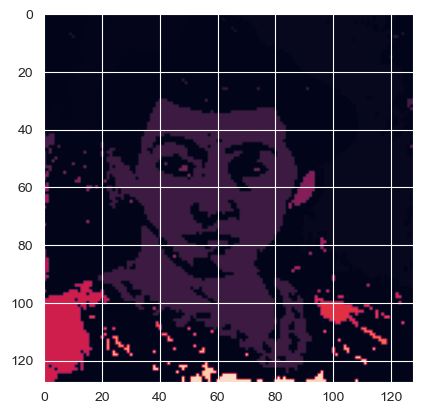

Haralick Features


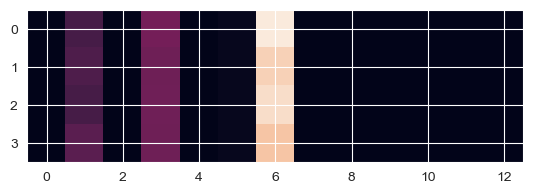

In [80]:
# setting gaussian filter
gaussian = mh.gaussian_filter(gray, 0.5)
# setting threshold value
gaussian = (gaussian > gaussian.mean())
# making is labelled image
labeled, n = mh.label(gaussian)

# showing image
print("Labeled Image")
imshow(labeled)
show()

# getting haralick features
h_feature = mh.features.haralick(labeled)

# showing the feature
print("Haralick Features")
imshow(h_feature)
show()